In [1]:
# Projeto integrado da Pós-graduação Lato Sensu em Inteligência Artificial e Aprendizado de Máquina | Junho de 2023
# Aluno: Matheus Bonetto Balbino

In [2]:
#Importando as bibliotecas

#Bibliotecas de manipulação do python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd
import tensorflow as tf

#Biblioteca do Keras para construção da rede neural
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


#Biblioteca sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Importação da biblioteca para obter os dados
import yfinance as yf

In [3]:
#Importando base de dados total
dataset = yf.download("ITUB4.SA", start='2019-01-02', end='2023-03-31', interval='1d')

#Base de treinamento
dataset_train = yf.download("ITUB4.SA", start='2019-01-02', end='2021-12-22', interval='1d')

#Base de teste
dataset_test = yf.download("ITUB4.SA", start='2021-12-23', end='2023-03-31', interval='1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
len(dataset)

1055

In [5]:
len(dataset_train)

737

In [6]:
len(dataset_test)

317

In [7]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,35.439999,37.139999,35.349998,37.000000,31.358290,25581700
2019-01-03,36.750000,37.610001,36.450001,37.610001,31.875282,21938600
2019-01-04,37.220001,37.709999,36.750000,36.980000,31.341347,24873500
2019-01-07,36.799999,37.500000,36.750000,37.049999,31.400661,16901100
2019-01-08,37.180000,37.570000,36.560001,37.520000,31.799017,19556300


In [8]:
dataset_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,35.439999,37.139999,35.349998,37.000000,31.358284,25581700
2019-01-03,36.750000,37.610001,36.450001,37.610001,31.875286,21938600
2019-01-04,37.220001,37.709999,36.750000,36.980000,31.341352,24873500
2019-01-07,36.799999,37.500000,36.750000,37.049999,31.400681,16901100
2019-01-08,37.180000,37.570000,36.560001,37.520000,31.799007,19556300


In [9]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,21.330000,21.570000,21.170000,21.340000,20.190018,22377000
2021-12-27,21.480000,21.700001,21.309999,21.559999,20.398169,14025800
2021-12-28,21.629999,21.700001,21.400000,21.480000,20.322472,15294200
2021-12-29,21.530001,21.580000,21.230000,21.299999,20.152174,12856100
2021-12-30,21.440001,21.440001,20.950001,20.950001,19.821037,39997300


In [10]:
dataset.isnull().sum().sum() #Retorna o número que valores que estão faltando no dataset

0

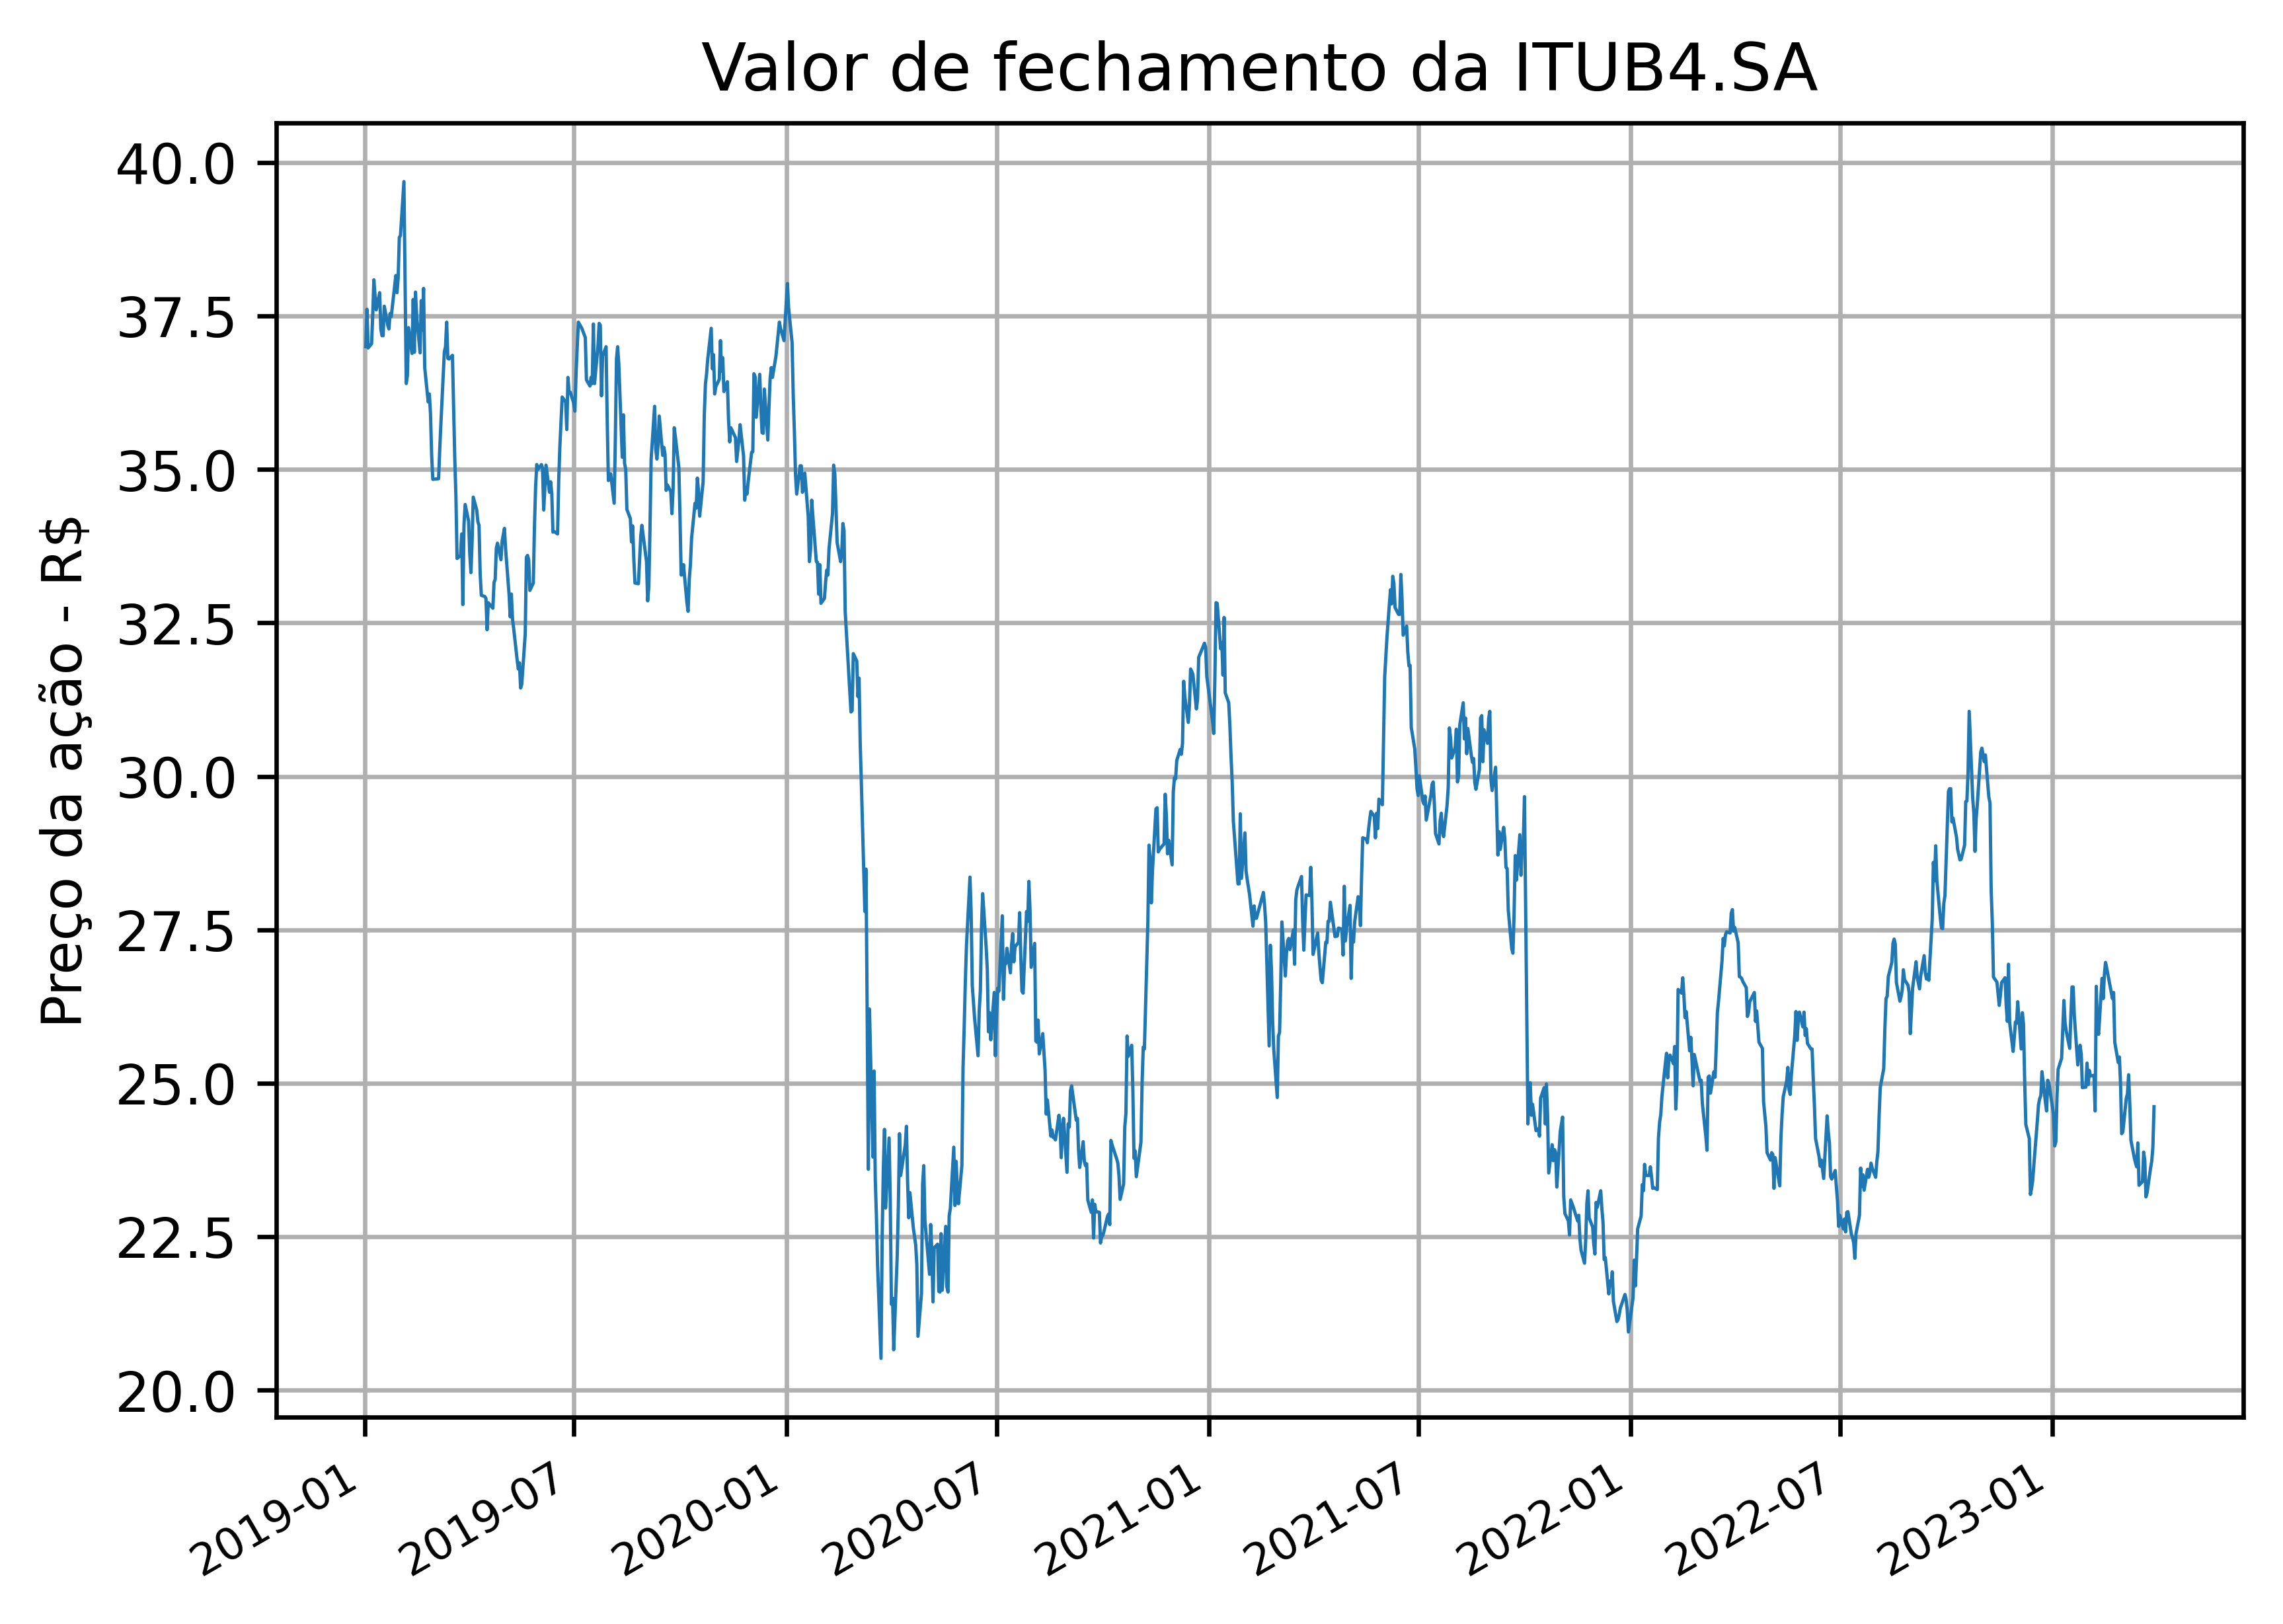

In [11]:
fig, ax = plt.subplots(dpi=600)

#Formatando os eixos
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

#Plotando o preço de fechamento em relação a data (intervalo de 1 dia)
ax.plot(dataset['Close'], lw=0.6)

#Adicionando títulos nos eixos
ax.set_ylabel('Preço da ação - R$')
ax.set_title('Valor de fechamento da ITUB4.SA')
ax.grid()

#Gráfico
plt.show()

In [12]:
#Análise simples, utilizando média móvel simples (MMS) de 9 dias e 30 dias

In [13]:
#Adicionando coluna MMS_9 e MMS_30
dataset['MMS_9'] = dataset['Close'].rolling(window=9, min_periods=1).mean()
dataset['MMS_30'] = dataset['Close'].rolling(window=30, min_periods=1).mean()

In [14]:
#Visualizando os últimos 5 valores do dataset
dataset.tail() 

,Open,High,Low,Close,Adj Close,Volume,MMS_9,MMS_30
Date,,,,,,,,
2023-03-24,23.160000,23.420000,22.740000,23.219999,23.187634,30018800,23.566666,24.915333
2023-03-27,23.500000,23.780001,23.379999,23.620001,23.587078,39378700,23.557778,24.838666
2023-03-28,23.639999,23.920000,23.500000,23.730000,23.696922,28363000,23.567778,24.769666
2023-03-29,23.750000,24.080000,23.580000,23.959999,23.926601,22773800,23.560000,24.678000
2023-03-30,24.320000,24.799999,24.219999,24.620001,24.585686,38191200,23.702222,24.619333


In [15]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,MMS_9,MMS_30
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03,1055.000000,1055.000000
mean,28.706038,29.096408,28.300882,28.683668,26.298170,3.391966e+07,28.734290,28.867134
std,4.732109,4.731858,4.714985,4.733287,3.643688,1.647173e+07,4.700682,4.634536
min,21.170000,21.309999,20.000000,20.520000,18.563330,7.774500e+06,21.286667,22.028666
25%,24.630000,25.125000,24.275001,24.695001,23.372136,2.246485e+07,24.711111,25.038333
50%,27.540001,27.980000,27.180000,27.530001,25.797039,3.107130e+07,27.498889,27.509667
75%,33.030001,33.459999,32.684999,33.000000,29.433064,4.150405e+07,33.261667,33.502667
max,38.669998,39.790001,38.400002,39.689999,33.883331,1.606699e+08,38.274445,37.749167


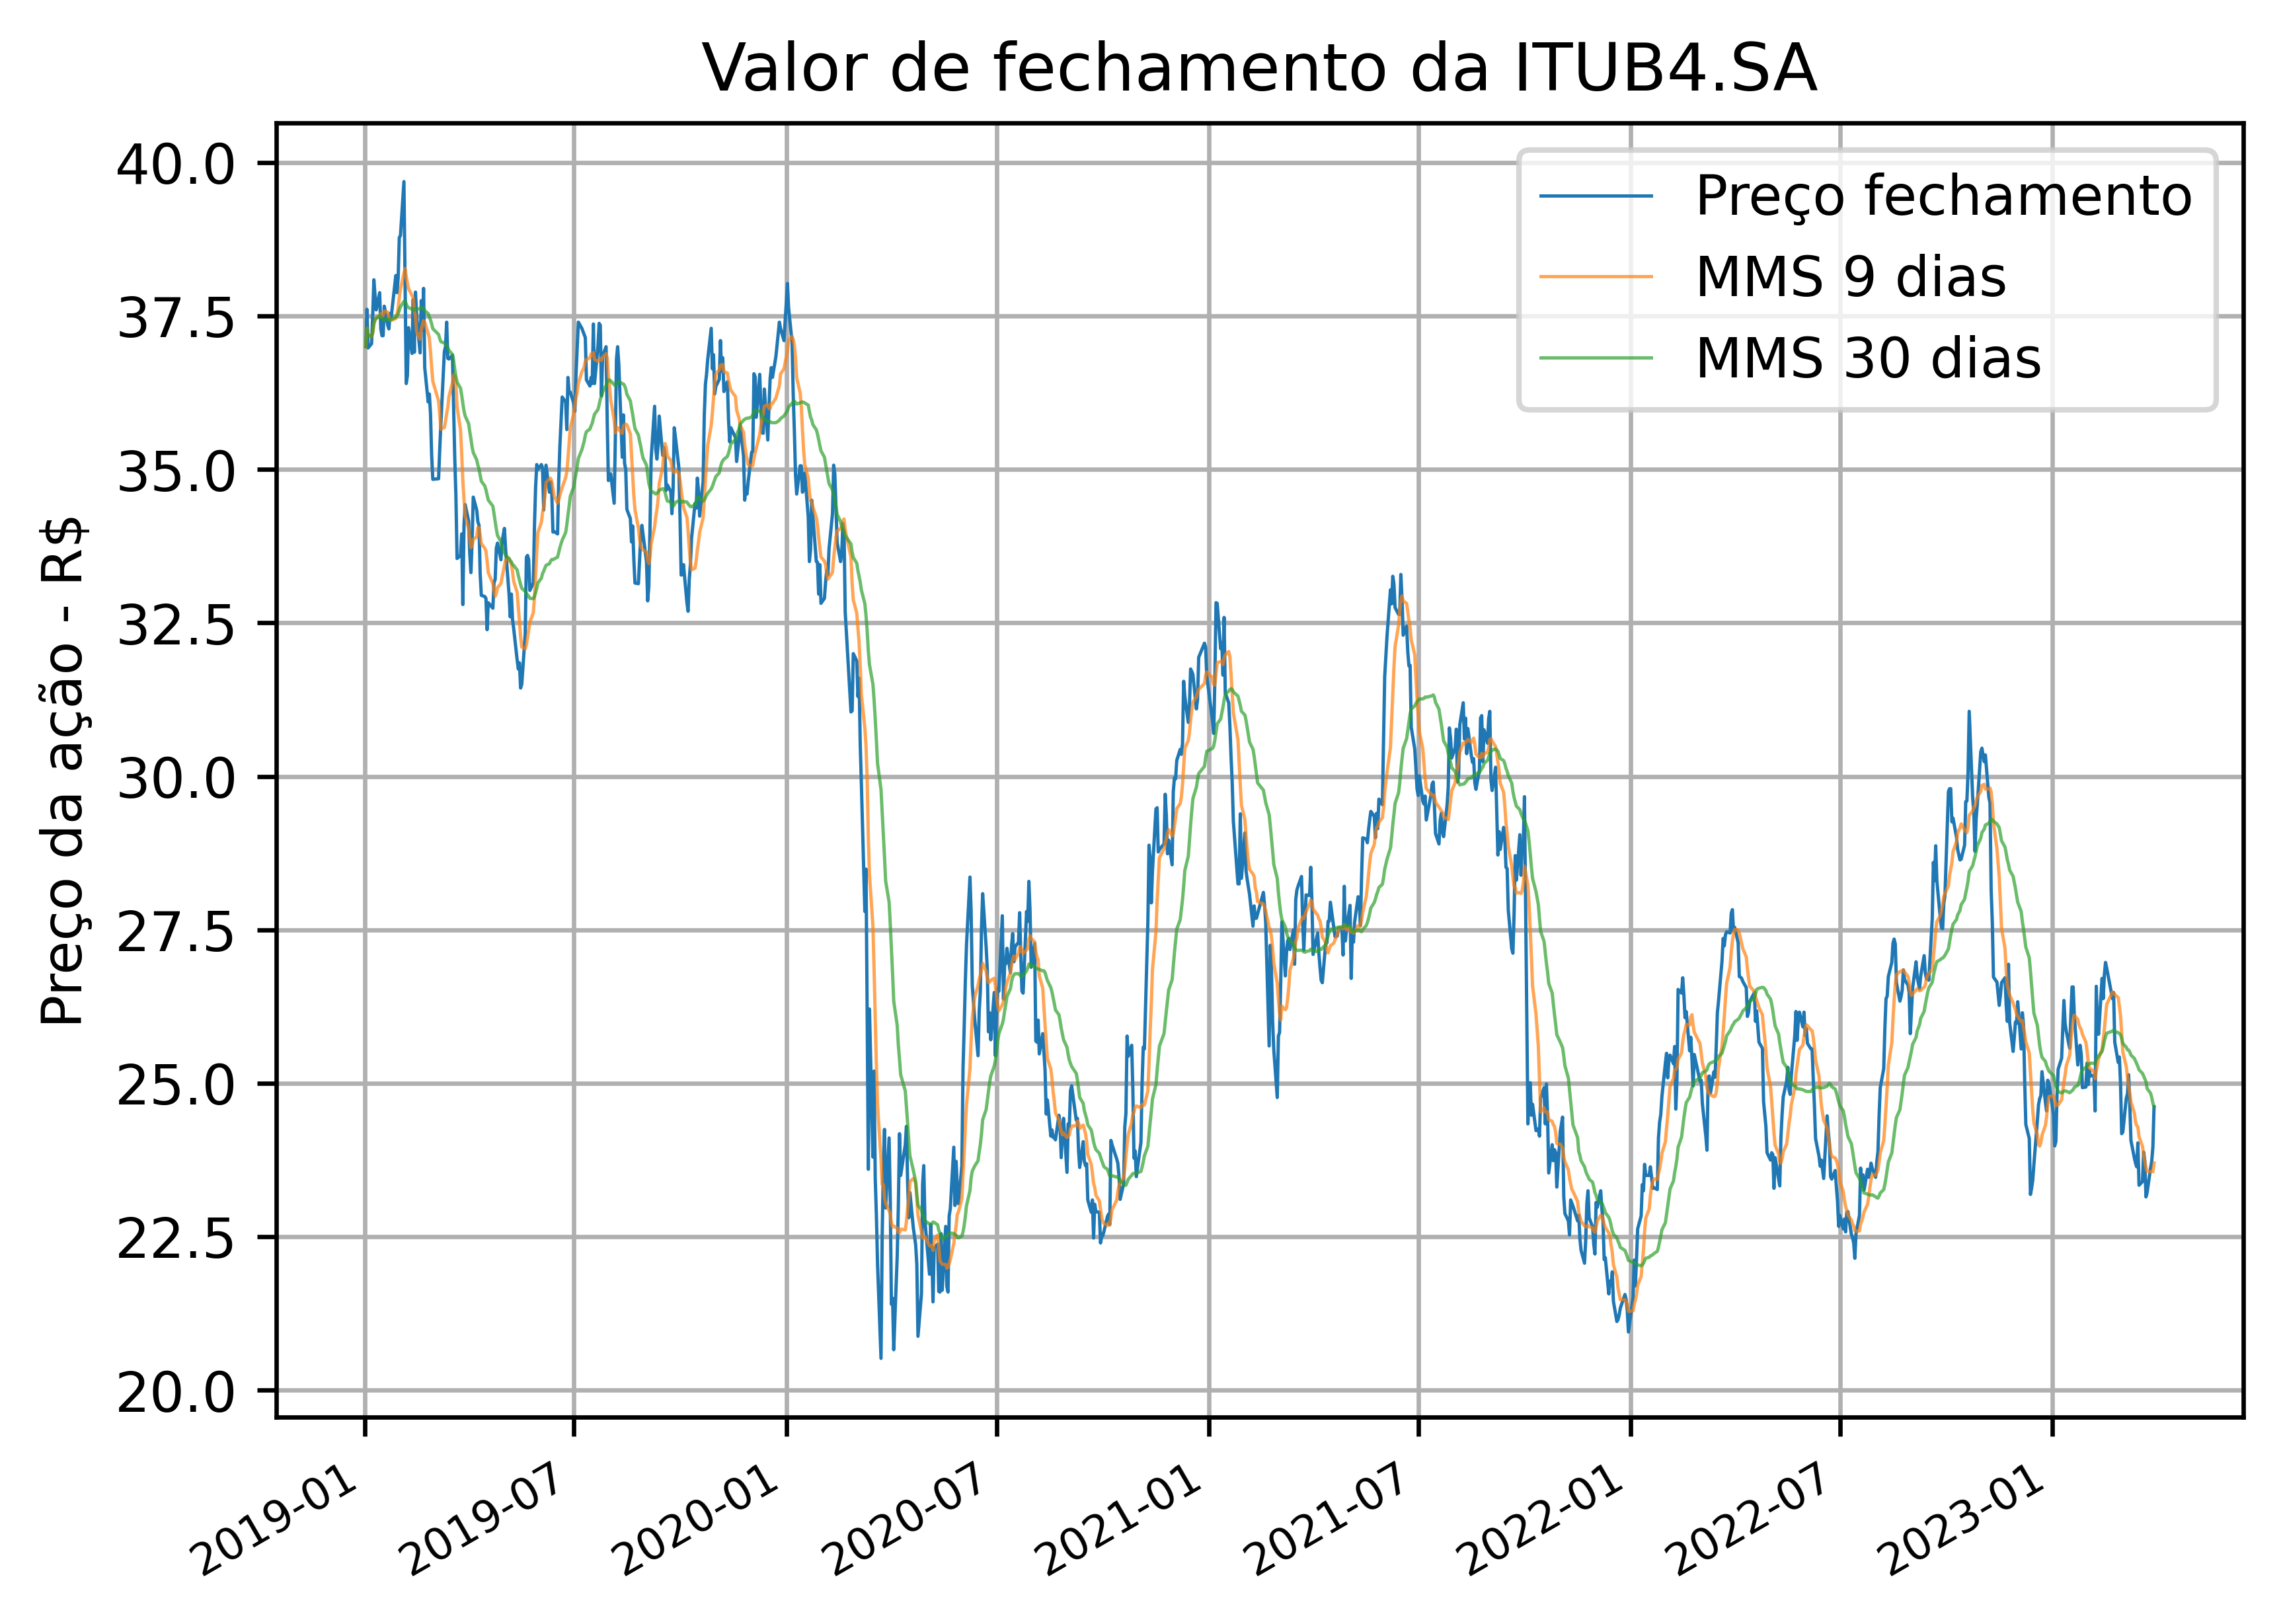

In [16]:
#Gráfico com as médias móveis
fig, ax = plt.subplots(dpi=600)
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(dataset['Close'], lw=0.6, label = 'Preço fechamento')
ax.plot(dataset['MMS_9'], lw=0.6, alpha=0.7, label='MMS 9 dias')
ax.plot(dataset['MMS_30'], lw=0.6, alpha=0.7, label='MMS 30 dias')

ax.set_ylabel('Preço da ação - R$')
ax.set_title('Valor de fechamento da ITUB4.SA')
ax.grid() 
ax.legend()

plt.show()

In [17]:
#Aplicando a rede neural LSTM

In [18]:
#Obtendo a coluna Close da base de treinamento e teste
training_set = dataset_train.iloc[:, 3:4].values 
real_stock_price = dataset_test.iloc[:, 3:4].values

In [19]:
#Normalizando
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
#Criando uma estrutura de dados com 60 etapas e 1 saída
X_train = []
y_train = []
for i in range(60, 737):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
#Remodelando
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
#Inicializando a rede RNN
regressor = Sequential()

In [23]:
#Adiocionando a primeira camada da LSTM
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [24]:
#Adicionando a segunda camada da LSTM
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:
#Adicionando a terceira camada da LSTM
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
#Adicionando a quarta camada da LSTM
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [27]:
#Adicionando a camada de saída
regressor.add(Dense(units = 1))

#Compilando a RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Ajustando a RNN ao conjunto de treinamento
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
22/22 [==============================] - 66s 207ms/step - loss: 0.0635
Epoch 2/100
22/22 [==============================] - 5s 222ms/step - loss: 0.0183
Epoch 3/100
22/22 [==============================] - 5s 231ms/step - loss: 0.0144
Epoch 4/100
22/22 [==============================] - 5s 240ms/step - loss: 0.0131
Epoch 5/100
22/22 [==============================] - 7s 337ms/step - loss: 0.0123
Epoch 6/100
22/22 [==============================] - 6s 253ms/step - loss: 0.0110
Epoch 7/100
22/22 [==============================] - 7s 307ms/step - loss: 0.0099
Epoch 8/100
22/22 [==============================] - 4s 182ms/step - loss: 0.0096
Epoch 9/100
22/22 [==============================] - 5s 205ms/step - loss: 0.0097
Epoch 10/100
22/22 [==============================] - 4s 169ms/step - loss: 0.0084
Epoch 11/100
22/22 [==============================] - 6s 281ms/step - loss: 0.0083
Epoch 12/100
22/22 [==============================] - 5s 225ms/step - loss: 0.0087
Epoch 13/100

In [28]:
#Resumo do modelo
print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [29]:
#Realizando as previsões

In [30]:
dataset_total = dataset['Close']

In [31]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [32]:
len(inputs)

377

In [33]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [34]:
#O segundo número é o len(inputs)
for i in range(60, 377): 
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

10/10 [==============================] - 7s 55ms/step


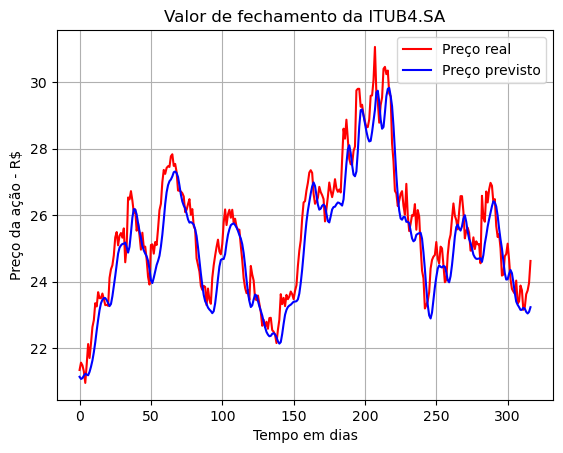

In [35]:
plt.plot(real_stock_price, color = 'red', label = 'Preço real')
plt.plot(predicted_stock_price, color = 'blue', label = 'Preço previsto')
plt.title('Valor de fechamento da ITUB4.SA')
plt.xlabel('Tempo em dias')
plt.ylabel('Preço da ação - R$')
plt.legend()
plt.grid()
plt.show()

In [36]:
#Criando dataset único

#Criando a coluna data
dataset_test_graf = dataset_test.reset_index() #Criando um index

In [37]:
print(dataset_test_graf)

          Date       Open       High        Low      Close  Adj Close  \
0   2021-12-23  21.330000  21.570000  21.170000  21.340000  20.190018   
1   2021-12-27  21.480000  21.700001  21.309999  21.559999  20.398169   
2   2021-12-28  21.629999  21.700001  21.400000  21.480000  20.322472   
3   2021-12-29  21.530001  21.580000  21.230000  21.299999  20.152174   
4   2021-12-30  21.440001  21.440001  20.950001  20.950001  19.821037   
..         ...        ...        ...        ...        ...        ...   
312 2023-03-24  23.160000  23.420000  22.740000  23.219999  23.187634   
313 2023-03-27  23.500000  23.780001  23.379999  23.620001  23.587078   
314 2023-03-28  23.639999  23.920000  23.500000  23.730000  23.696922   
315 2023-03-29  23.750000  24.080000  23.580000  23.959999  23.926601   
316 2023-03-30  24.320000  24.799999  24.219999  24.620001  24.585686   

       Volume  
0    22377000  
1    14025800  
2    15294200  
3    12856100  
4    39997300  
..        ...  
312  300188

In [38]:
real_stock_price_date = dataset_test_graf['Date'] #Criando um dataset com a coluna Date

In [39]:
print(real_stock_price_date)

0     2021-12-23
1     2021-12-27
2     2021-12-28
3     2021-12-29
4     2021-12-30
         ...    
312   2023-03-24
313   2023-03-27
314   2023-03-28
315   2023-03-29
316   2023-03-30
Name: Date, Length: 317, dtype: datetime64[ns]


In [40]:
real_stock_price_date = pd.DataFrame(real_stock_price_date, columns = ['Date']) #Incluindo a linha com o nome Date

In [41]:
real_stock_price_date.head()

,Date
0,2021-12-23
1,2021-12-27
2,2021-12-28
3,2021-12-29
4,2021-12-30


In [42]:
real_stock_price_close = dataset_test_graf['Close'] #Criando um dataset close real

In [43]:
print(real_stock_price_close)

0      21.340000
1      21.559999
2      21.480000
3      21.299999
4      20.950001
         ...    
312    23.219999
313    23.620001
314    23.730000
315    23.959999
316    24.620001
Name: Close, Length: 317, dtype: float64


In [44]:
real_stock_price_close_gra = pd.DataFrame(real_stock_price_close, columns = ['Close']) #Criando um dataset real

In [45]:
real_stock_price_close_gra.head()

,Close
0,21.340000
1,21.559999
2,21.480000
3,21.299999
4,20.950001


In [46]:
predicted_stock_price_gra = pd.DataFrame(predicted_stock_price, columns = ['Predicted']) #Criando um dataset predicted

In [47]:
predicted_stock_price_gra.head()

,Predicted
0,21.133522
1,21.069754
2,21.093536
3,21.167400
4,21.224705


In [48]:
dataset_predicted=pd.concat([real_stock_price_date, real_stock_price_close_gra, predicted_stock_price_gra],axis=1,join='inner')

In [49]:
dataset_predicted.tail(5)

,Date,Close,Predicted
312,2023-03-24,23.219999,23.185417
313,2023-03-27,23.620001,23.087543
314,2023-03-28,23.730000,23.039593
315,2023-03-29,23.959999,23.087317
316,2023-03-30,24.620001,23.228796


In [50]:
dataset_predicted = dataset_predicted.set_index('Date')

In [51]:
dataset_predicted.tail(5)

,Close,Predicted
Date,,
2023-03-24,23.219999,23.185417
2023-03-27,23.620001,23.087543
2023-03-28,23.730000,23.039593
2023-03-29,23.959999,23.087317
2023-03-30,24.620001,23.228796


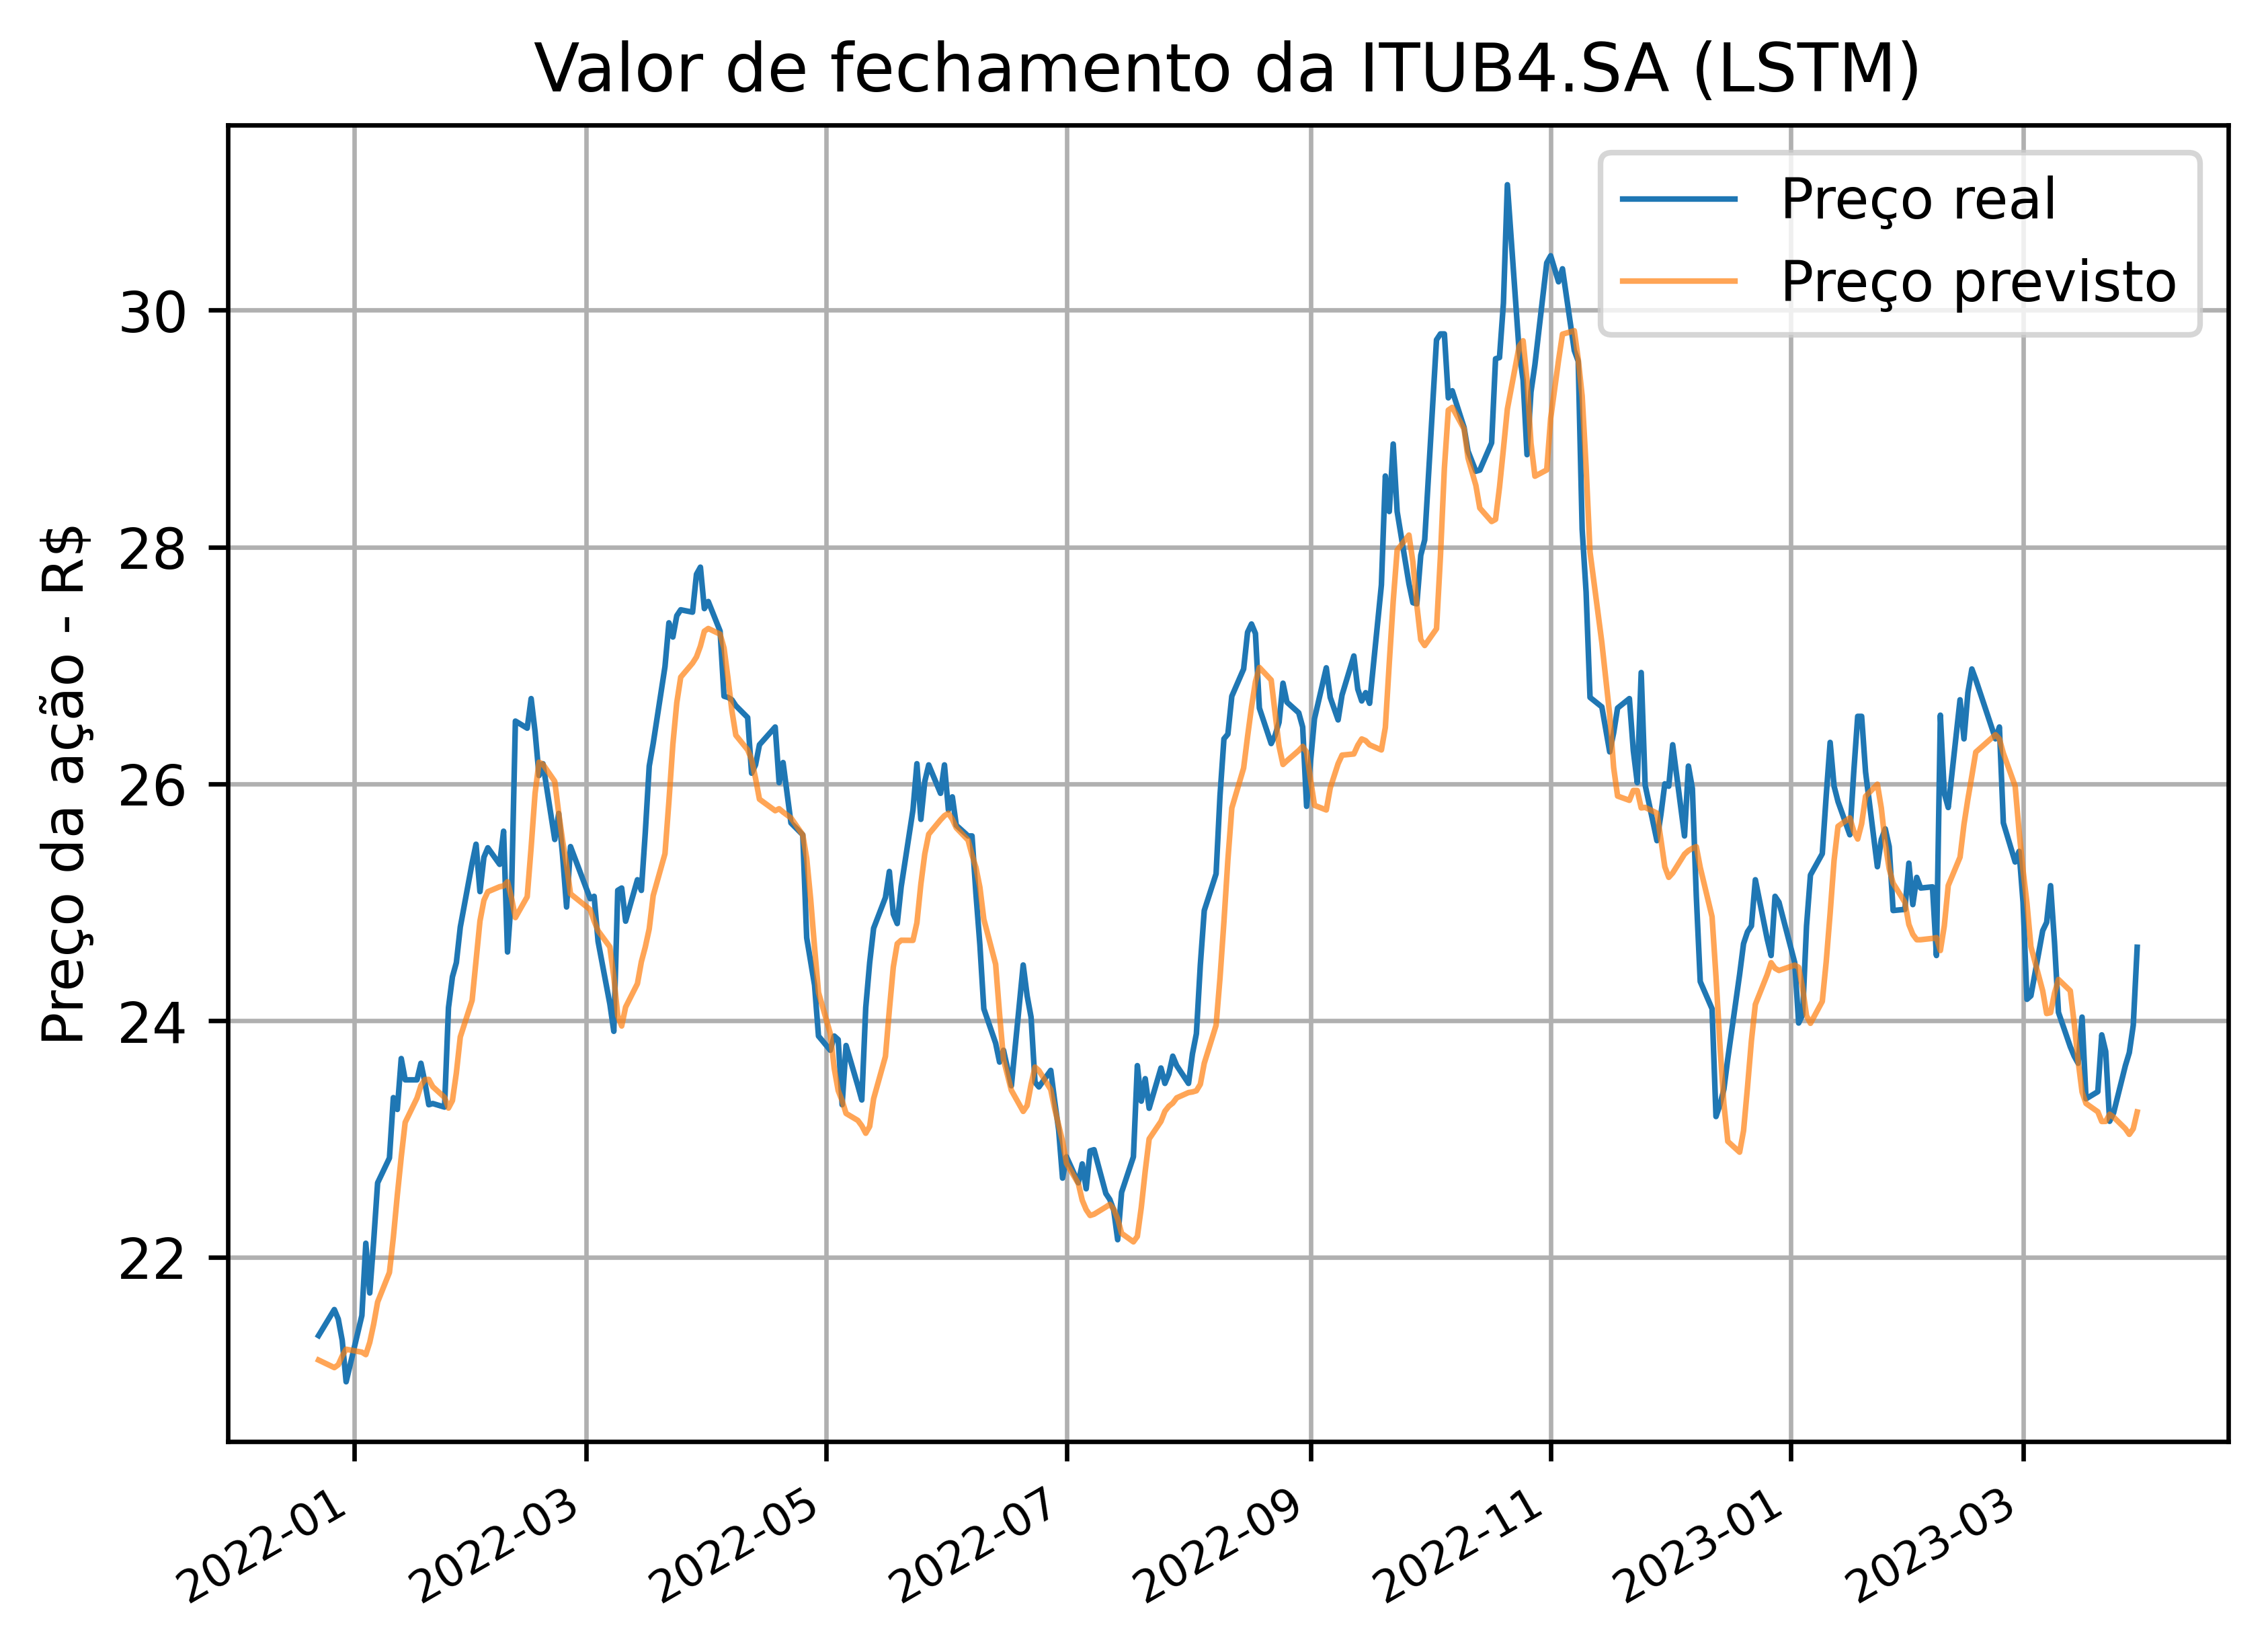

In [65]:
#Gráfico com as previsões
fig, ax = plt.subplots(dpi=600)
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(dataset_predicted['Close'], lw=1, label = 'Preço real')
ax.plot(dataset_predicted['Predicted'], lw=1, alpha=0.7, label='Preço previsto')

ax.set_ylabel('Preço da ação - R$')
ax.set_title('Valor de fechamento da ITUB4.SA (LSTM)')
ax.grid() 
ax.legend()

plt.show()

In [53]:
#Métricas de avaliação

#Erro Médio Absoluto - MAE
MAE = mean_absolute_error(real_stock_price_close_gra, predicted_stock_price_gra)

In [54]:
#Erro Quadrático Médio - MSE
MSE = mean_squared_error(real_stock_price_close_gra, predicted_stock_price_gra, squared = True)

In [55]:
#Raiz quadrada do erro médio - RMSE
RMSE = mean_squared_error(real_stock_price_close_gra, predicted_stock_price_gra, squared = False)

In [56]:
#Média Percentual Absoluta do Erro - MAPE
MAPE = mean_absolute_percentage_error(real_stock_price_close_gra, predicted_stock_price_gra)

In [57]:
#Erro relativo

dataset_predicted['Error %'] = dataset_predicted.apply(lambda x: 100*(abs(x['Close']-x['Predicted'])/x['Close']), axis=1)

In [58]:
dataset_predicted.head()

,Close,Predicted,Error %
Date,,,
2021-12-23,21.340000,21.133522,0.967564
2021-12-27,21.559999,21.069754,2.273867
2021-12-28,21.480000,21.093536,1.799177
2021-12-29,21.299999,21.167400,0.622530
2021-12-30,20.950001,21.224705,1.311236


In [59]:
Max = max(dataset_predicted['Error %'])

In [60]:
Min = min(dataset_predicted['Error %'])

In [61]:
print('Métricas de avaliação LSTM - ITUB4:')
print("MAE: {:.3f}".format(MAE))
print("MAPE: {:.3f}%".format(MAPE*100))
print("RMSE: {:.3f}".format(RMSE))
print("MSE: {:.3f}".format(MSE))
print('Máximo erro relativo = {:.3f}%'.format(Max))
print('Mínimo erro relativo = {:.3f}%'.format(Min))

Métricas de avaliação LSTM - ITUB4:
MAE: 0.585
MAPE: 2.270%
RMSE: 0.745
MSE: 0.556
Máximo erro relativo = 8.202%
Mínimo erro relativo = 0.003%


In [62]:
print('LSTM - ITUB4')
dataset_predicted.describe()

LSTM - ITUB4


,Close,Predicted,Error %
count,317.000000,317.000000,317.000000
mean,25.473218,25.062992,2.270157
std,1.922707,1.866530,1.737857
min,20.950001,21.069754,0.002715
25%,23.959999,23.503214,0.810245
50%,25.410000,25.046207,1.915862
75%,26.580000,26.163609,3.350086
max,31.059999,29.827002,8.201990


In [63]:
# Calcula os retornos logarítmicos usando o preço de fechamento 
returns = np.log(dataset_predicted['Close'] / dataset_predicted['Close'].shift(1))
volatility = returns.std() * np.sqrt(252) 
sharpe_ratio = ((returns.mean()*252) - 0.1375) / volatility #Selic 13,75%
print("Sharpe Ratio - ITUB4: {:.2f}".format(sharpe_ratio))

Sharpe Ratio - ITUB4: -0.09


In [64]:
# Calcula os retornos logarítmicos usando o preço de fechamento 
returns = np.log(dataset_predicted['Predicted'] / dataset_predicted['Predicted'].shift(1))
volatility = returns.std() * np.sqrt(252) 
sharpe_ratio = ((returns.mean()*252) - 0.1375) / volatility #Selic 13,75%
print("Sharpe Ratio - ITUB4: {:.2f}".format(sharpe_ratio))

Sharpe Ratio - ITUB4: -0.41
